In [55]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [56]:
m = 1000
X_moons, y_moons = make_moons(m, noise=0.1, random_state=42)

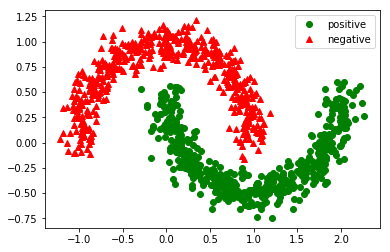

In [57]:
plt.plot(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1], 'go', label="positive")
plt.plot(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1], 'r^', label="negative")
plt.legend()
plt.show()


In [58]:
X_moons

array([[-0.05146968,  0.44419863],
       [ 1.03201691, -0.41974116],
       [ 0.86789186, -0.25482711],
       ..., 
       [ 1.68425911, -0.34822268],
       [-0.9672013 ,  0.26367208],
       [ 0.78758971,  0.61660945]])

In [59]:
X_moons_bias = np.c_[np.ones((m, 1)), X_moons]
y_moons = np.reshape(y_moons, (-1, 1))

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_moons_bias, y_moons, test_size=0.2, random_state=42)

In [61]:
X_train

array([[ 1.        ,  2.04327299,  0.27579208],
       [ 1.        , -1.06204208,  0.40739827],
       [ 1.        , -0.14516455,  1.08422192],
       ..., 
       [ 1.        , -0.79675371,  0.58789752],
       [ 1.        ,  1.07172763,  0.13482039],
       [ 1.        ,  1.93189866,  0.13158788]])

In [62]:
def random_batch(X_train, y_train, batch_size=100):
    indices = np.random.randint(0, len(X_train), batch_size)
    return X_train[indices], y_train[indices]

In [63]:
X_batch, y_batch = random_batch(X_train, y_train)

In [64]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [65]:
reset_graph()

In [66]:
X = tf.placeholder(tf.float32, shape=(None, 3), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([3,1], -1.0, 1.0, seed=42), name="theta")
logits = tf.matmul(X, theta, name="logits")
y_prob = tf.sigmoid(logits)

In [67]:
loss = tf.losses.log_loss(y, y_prob)
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [68]:
init = tf.global_variables_initializer()

In [70]:
n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        loss_val = loss.eval({X:X_test, y:y_test})
        if epoch % 100 == 0:
            print("Epoch:", epoch, "\tloss:", loss_val)
    
    y_prob_val = y_prob.eval(feed_dict={X: X_test, y:y_test})

Epoch: 0 	loss: 0.793751
Epoch: 100 	loss: 0.345514
Epoch: 200 	loss: 0.304579
Epoch: 300 	loss: 0.285203
Epoch: 400 	loss: 0.273831
Epoch: 500 	loss: 0.266793
Epoch: 600 	loss: 0.262146
Epoch: 700 	loss: 0.259069
Epoch: 800 	loss: 0.256521
Epoch: 900 	loss: 0.254689


In [77]:
y_pred = (y_prob_val >= 0.5)

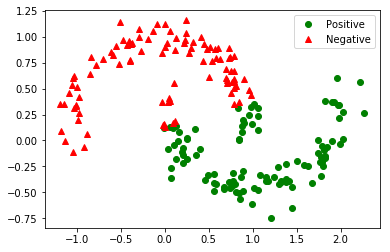

In [84]:
y_pred_idx = y_pred.reshape(-1) # a 1D array rather than a column vector
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'go', label="Positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'r^', label="Negative")
plt.legend()
plt.show()